In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs 

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

625

In [6]:
# Import the datetime module from the datetime library.
from datetime import datetime

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1ea2c2f1de282b6daa335757d472f4be


In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [9]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | avarua
Processing Record 2 of Set 1 | alta
Processing Record 3 of Set 1 | ushuaia
Processing Record 4 of Set 1 | marrakesh
Processing Record 5 of Set 1 | kapaa
Processing Record 6 of Set 1 | fairbanks
Processing Record 7 of Set 1 | tuktoyaktuk
Processing Record 8 of Set 1 | weligama
Processing Record 9 of Set 1 | jamestown
Processing Record 10 of Set 1 | vaini
Processing Record 11 of Set 1 | denpasar
Processing Record 12 of Set 1 | azimur
City not found. Skipping...
Processing Record 13 of Set 1 | mar del plata
Processing Record 14 of Set 1 | busselton
Processing Record 15 of Set 1 | kenai
Processing Record 16 of Set 1 | rach gia
Processing Record 17 of Set 1 | puerto ayora
Processing Record 18 of Set 1 | formosa
Processing Record 19 of Set 1 | casas grandes
Processing Record 20 of Set 1 | katsuura
Processing Record 21 of Set 1 | yenangyaung
Processing Record 22 of Set 1 | hermanus
Processing Record 23 of Set 1 | okha
Processing Record 24 of Set 1 | baren

Processing Record 43 of Set 4 | flinders
Processing Record 44 of Set 4 | troitsko-pechorsk
Processing Record 45 of Set 4 | kutum
Processing Record 46 of Set 4 | mpika
Processing Record 47 of Set 4 | beyneu
Processing Record 48 of Set 4 | port hardy
Processing Record 49 of Set 4 | bairiki
Processing Record 50 of Set 4 | chapais
Processing Record 1 of Set 5 | wuwei
Processing Record 2 of Set 5 | airai
Processing Record 3 of Set 5 | victoria
Processing Record 4 of Set 5 | karasjok
Processing Record 5 of Set 5 | along
Processing Record 6 of Set 5 | ribeira grande
Processing Record 7 of Set 5 | zhangye
Processing Record 8 of Set 5 | georgetown
Processing Record 9 of Set 5 | savannah bight
Processing Record 10 of Set 5 | zelenets
Processing Record 11 of Set 5 | skerries
Processing Record 12 of Set 5 | lompoc
Processing Record 13 of Set 5 | lebyazhye
Processing Record 14 of Set 5 | nyurba
Processing Record 15 of Set 5 | nuuk
Processing Record 16 of Set 5 | miri
Processing Record 17 of Set 5 |

Processing Record 36 of Set 8 | haines junction
Processing Record 37 of Set 8 | saint george
Processing Record 38 of Set 8 | coahuayana
Processing Record 39 of Set 8 | sayat
Processing Record 40 of Set 8 | kamenskoye
City not found. Skipping...
Processing Record 41 of Set 8 | nakasongola
Processing Record 42 of Set 8 | hopelchen
Processing Record 43 of Set 8 | lumeje
Processing Record 44 of Set 8 | mao
Processing Record 45 of Set 8 | ushtobe
Processing Record 46 of Set 8 | dindori
Processing Record 47 of Set 8 | witrivier
City not found. Skipping...
Processing Record 48 of Set 8 | buraydah
Processing Record 49 of Set 8 | walcz
Processing Record 50 of Set 8 | hofn
Processing Record 1 of Set 9 | staunton
Processing Record 2 of Set 9 | beloha
Processing Record 3 of Set 9 | aransas pass
Processing Record 4 of Set 9 | virginia beach
Processing Record 5 of Set 9 | ibra
Processing Record 6 of Set 9 | harper
Processing Record 7 of Set 9 | udachnyy
Processing Record 8 of Set 9 | lira
Processing

City not found. Skipping...
Processing Record 18 of Set 12 | eyl
Processing Record 19 of Set 12 | barra dos coqueiros
Processing Record 20 of Set 12 | ullapool
Processing Record 21 of Set 12 | shumyachi
Processing Record 22 of Set 12 | fort saint john
City not found. Skipping...
Processing Record 23 of Set 12 | puerto madryn
Processing Record 24 of Set 12 | da lat
Processing Record 25 of Set 12 | campobasso
Processing Record 26 of Set 12 | patratu
City not found. Skipping...
Processing Record 27 of Set 12 | husavik
Processing Record 28 of Set 12 | kiama
Processing Record 29 of Set 12 | bulawayo
Processing Record 30 of Set 12 | khani
Processing Record 31 of Set 12 | simbahan
Processing Record 32 of Set 12 | rocha
Processing Record 33 of Set 12 | vanderhoof
Processing Record 34 of Set 12 | aswan
Processing Record 35 of Set 12 | aykhal
Processing Record 36 of Set 12 | shache
Processing Record 37 of Set 12 | bekhtery
Processing Record 38 of Set 12 | ulagan
Processing Record 39 of Set 12 | 

In [10]:
len(city_data)

570

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Avarua,-21.21,-159.78,69.8,83,100,10.29,CK,2020-07-06 02:56:56
1,Alta,69.97,23.27,48.2,70,90,11.41,NO,2020-07-06 03:00:20
2,Ushuaia,-54.80,-68.30,33.8,86,40,8.05,AR,2020-07-06 02:56:52
3,Marrakesh,31.63,-8.01,87.8,27,40,4.70,MA,2020-07-06 03:00:05
4,Kapaa,22.08,-159.32,84.2,70,1,10.29,US,2020-07-06 02:56:52
5,Fairbanks,64.84,-147.72,73.4,35,1,11.41,US,2020-07-06 02:55:02
6,Tuktoyaktuk,69.45,-133.04,42.8,87,90,13.87,CA,2020-07-06 02:57:12
7,Weligama,5.97,80.42,81.9,81,100,10.63,LK,2020-07-06 03:00:21
8,Jamestown,42.10,-79.24,75.2,41,1,4.70,US,2020-07-06 02:56:57
9,Vaini,-21.20,-175.20,78.8,83,40,11.41,TO,2020-07-06 02:56:55


In [12]:
new_column_order = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Avarua,CK,2020-07-06 02:56:56,-21.21,-159.78,69.8,83,100,10.29
1,Alta,NO,2020-07-06 03:00:20,69.97,23.27,48.2,70,90,11.41
2,Ushuaia,AR,2020-07-06 02:56:52,-54.80,-68.30,33.8,86,40,8.05
3,Marrakesh,MA,2020-07-06 03:00:05,31.63,-8.01,87.8,27,40,4.70
4,Kapaa,US,2020-07-06 02:56:52,22.08,-159.32,84.2,70,1,10.29
5,Fairbanks,US,2020-07-06 02:55:02,64.84,-147.72,73.4,35,1,11.41
6,Tuktoyaktuk,CA,2020-07-06 02:57:12,69.45,-133.04,42.8,87,90,13.87
7,Weligama,LK,2020-07-06 03:00:21,5.97,80.42,81.9,81,100,10.63
8,Jamestown,US,2020-07-06 02:56:57,42.10,-79.24,75.2,41,1,4.70
9,Vaini,TO,2020-07-06 02:56:55,-21.20,-175.20,78.8,83,40,11.41


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [15]:
# Import the time module.
import time

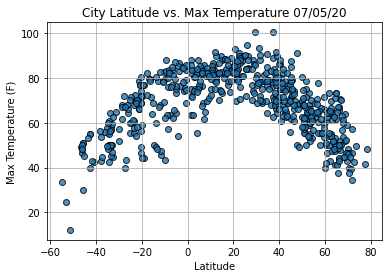

In [16]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

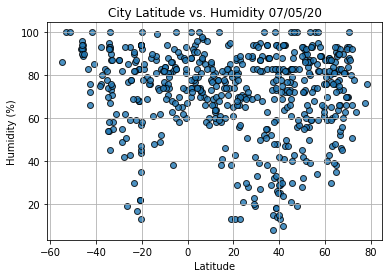

In [17]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

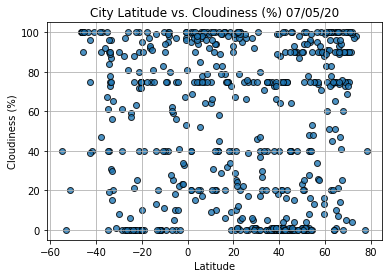

In [18]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(lats,
           cloudiness,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure
plt.savefig("weather_data/Fig3.png")
# Show plot
plt.show()

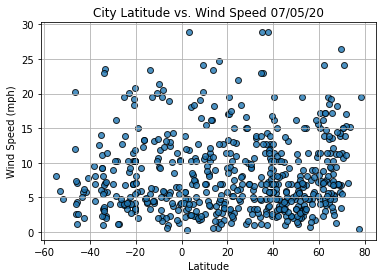

In [19]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [20]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [21]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.  
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

In [22]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

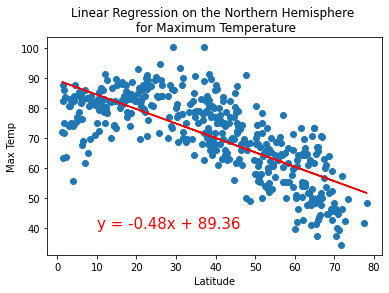

In [23]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(10,40))

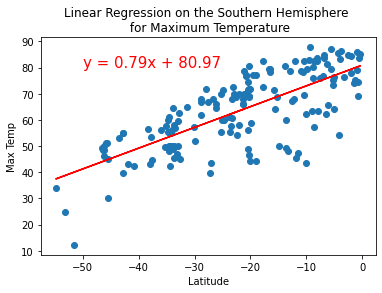

In [24]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,80))

In [25]:
linregress(northern_hemi_df["Lat"],northern_hemi_df["Max Temp"])

LinregressResult(slope=-0.48146098305114887, intercept=89.36327803767236, rvalue=-0.7324070821475911, pvalue=2.867105726598792e-69, stderr=0.022295556807104433)

In [26]:
linregress(southern_hemi_df["Lat"],southern_hemi_df["Max Temp"])

LinregressResult(slope=0.7938402598412153, intercept=80.96848226013991, rvalue=0.7387704531626832, pvalue=9.807706042241346e-30, stderr=0.056723376542303)

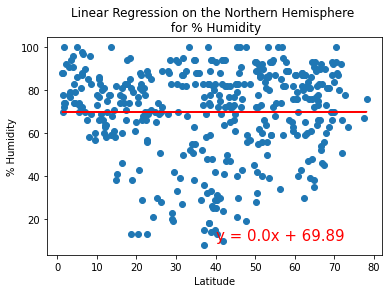

In [27]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))

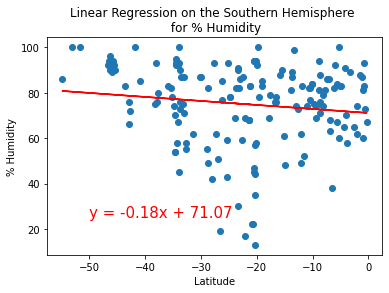

In [28]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,25))

In [29]:
linregress(northern_hemi_df["Lat"],northern_hemi_df["Humidity"])

LinregressResult(slope=0.0012486774843451895, intercept=69.88708847731722, rvalue=0.001219915996725728, pvalue=0.9804741520117335, stderr=0.050987944956361254)

In [30]:
linregress(southern_hemi_df["Lat"],southern_hemi_df["Humidity"])

LinregressResult(slope=-0.17670357286226632, intercept=71.07128847359425, rvalue=-0.13094636746026186, pvalue=0.0936450429181837, stderr=0.10478578419547628)

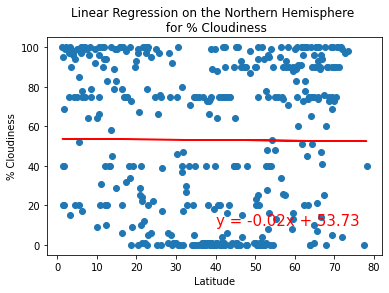

In [31]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness',(40,10))

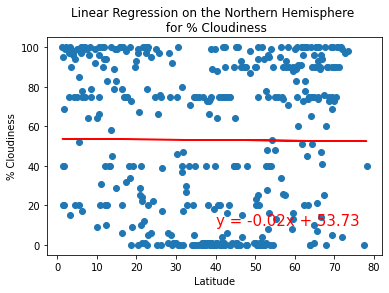

In [32]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness',(40,10))

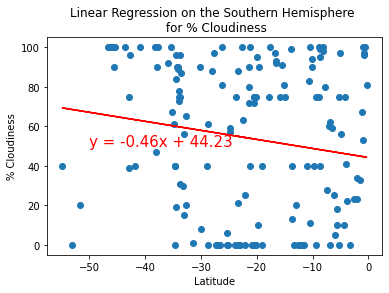

In [33]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,50))

In [34]:
linregress(northern_hemi_df["Lat"],northern_hemi_df["Cloudiness"])

LinregressResult(slope=-0.016326027068462198, intercept=53.72580751600755, rvalue=-0.008585783974931416, pvalue=0.8632372986307939, stderr=0.09471789206422461)

In [35]:
linregress(southern_hemi_df["Lat"],southern_hemi_df["Cloudiness"])

LinregressResult(slope=-0.45768547952005506, intercept=44.22958327070738, rvalue=-0.1612436269836695, pvalue=0.03854377456152922, stderr=0.21941704496638892)

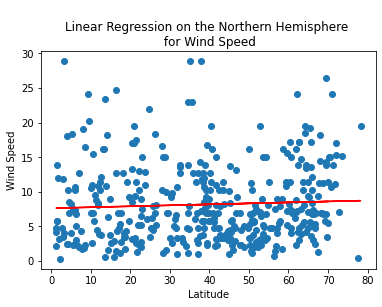

In [36]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,35))

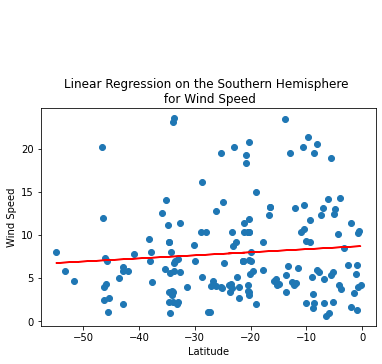

In [37]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,35))

In [38]:
linregress(northern_hemi_df["Lat"],northern_hemi_df["Wind Speed"])

LinregressResult(slope=0.013985965556360827, intercept=7.617854431879558, rvalue=0.0516145951155707, pvalue=0.30010698187639023, stderr=0.013479945605970227)

In [39]:
linregress(southern_hemi_df["Lat"],southern_hemi_df["Wind Speed"])

LinregressResult(slope=0.035679131949838426, intercept=8.71278674836934, rvalue=0.08939067543292056, pvalue=0.2535362678881677, stderr=0.03113767146791815)